# Exercises (14/05/2020)

## Exercise #1

The daily production of milk of 6 cows in a cow breeding are in the table. A cow of another breeding produces 40 L/day. Is this production different (p<0.05)?

In [1]:
import pandas as pd
table1 = pd.read_excel("datasets/cows.xlsx")
table1

,Cows,Milk Production(L/day)
0,1,27
1,2,45
2,3,38
3,4,20
4,5,22
5,6,50


In [2]:
milk_production = table1['Milk Production(L/day)']
milk_production.describe()

count     6.000000
mean     33.666667
std      12.500667
min      20.000000
25%      23.250000
50%      32.500000
75%      43.250000
max      50.000000
Name: Milk Production(L/day), dtype: float64

A __normality test__ is a statistical process used to determine if a sample or any group of data fits a standard normal distribution. A normality test can be performed mathematically or graphically. A visual inspection usually in enough to assume a dataset normally distributed. A popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

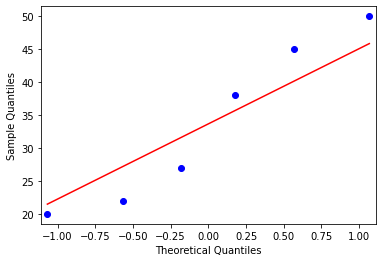

In [3]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(milk_production, line='s')
pyplot.show()

We can't really draw a conclusion. It looks like a uniform distribution or could be normal with fluctuation given by the small dimension of the data sample.

The __null hypothesis__(H0) is a general statement or default position that there is no relationship between two measured phenomena, or no association among groups. In other words it is a basic assumption or made based on domain or problem knowledge. __Alpha__ sets the standard for how extreme the data must be before we can reject the null hypothesis.  The __p-value__ indicates how extreme the data are.  We compare the p-value with the alpha to determine whether the observed data are statistically significantly different from the null hypothesis:
- If the p-value is less than or equal to the alpha (p<0.05), then we reject the null hypothesis, and we say the result is __statistically significant__. 
- If the p-value is greater than alpha (p>0.05), then we fail to reject the null hypothesis, and we say that the result is __statistically nonsignificant__.

Referring to our problem we may reformulate as follows:

- __NULL HYPOTHESIS (H0)__: "_The production is the same, that is our breeding produces pretty much the same than the reference average value of 40L/day_"

- __ALTERNATIVE HYPOTHESIS (H1)__: "_The production is significantly different, that is our breeding produces much more are much less than the reference average value of 40L/day_"

In [4]:
h0 = 40
alpha = 0.05

The __One-Sample t-Test__ is a parametric test that determines whether the sample mean is statistically different from a known or hypothesised population mean. 

In [5]:
from scipy.stats import ttest_1samp
tset, pval = ttest_1samp(milk_production, h0)

The __p-value__ represents the probability of getting values above mean+tset and below mean-tset.

In [6]:
if pval < alpha:  
    print("we are rejecting null hypothesis, result is statistically significant")
else:
    print("we are accepting null hypothesis, the result is NOT statistically significant")

we are accepting null hypothesis, the result is NOT statistically significant


## Exercise #2

The file "Sow.xls" includes several data measured from sow during their gestational age. 

1. check if the weights (“PesogestazioneKg”) is normally distributed;
2. check if there is a difference of weights (“PesogestazioneKg”) between treatment (“Trattamento”, 1 vs. 0);

In [7]:
table2 = pd.read_excel("datasets/Prova+scrofe+gest.xls")

In [8]:
peso_gestazione = table2['Peso gestazione, kg']
peso_gestazione.describe()

count     47.000000
mean     199.170213
std       92.124047
min      149.000000
25%      169.500000
50%      186.000000
75%      201.500000
max      802.000000
Name: Peso gestazione, kg, dtype: float64

### 2.1 Check if the weights (PesoGestazione) is normally distributed

The question is which test to use to check normality? Usually a visual inspection is enough to draw conclusion on the data sample. So let's start with a Q-Q plot.

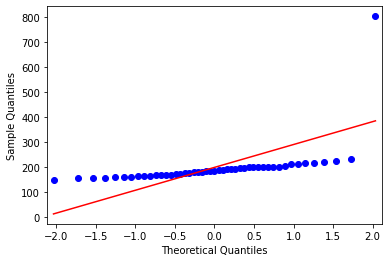

In [9]:
qqplot(peso_gestazione, line='s')
pyplot.show()

A flat Q-Q plot means that our data is more bunched together than we would expect from a normal distribution. For example, in a uniform distribution, our data is bounded between 0 and 1. And within that range, each value is equally likely. So the extremes of the range (like 0.01 and 0.99) are just as likely as something in the middle like 0.50. This is very different from a normal distribution.

Let's perform a countercheck, let's use another kind of normality test, the __Lilliefors test__. In statistics, the Lilliefors test is a normality test based on the __Kolmogorov–Smirnov test__. It is used to test the null hypothesis that data come from a normally distributed population, when the null hypothesis does not specify which normal distribution.

__H0__: _"The sample comes from a normally distributed population"_

In [20]:
from statsmodels.stats.diagnostic import lilliefors

ksstat, pvalue = lilliefors(peso_gestazione)

if pvalue < alpha:  
    print("we are rejecting null hypothesis, result is statistically significant, the sample DOES NOT come from a normal distribution.")
else:
    print("we are accepting null hypothesis, the result is NOT statistically significant, the sample comes from a normal distribution.")

we are rejecting null hypothesis, result is statistically significant, the sample DOES NOT come from a normal distribution.


### 2.2 Check if there is a difference of weights (“PesoGestazione”) between treatment (“Trattamento”, 1 vs. 0)

__H0__: _"Different Treatment does not affect weight"_

In [11]:
table2[['Peso gestazione, kg', 'Trattamento']]

,"Peso gestazione, kg",Trattamento
0,226,1
1,232,1
2,211,1
3,203,1
4,167,1
5,158,1
6,186,1
7,200,1
8,202,1
9,222,1


The most common use of the __Kruskal–Wallis__ test is when you have one nominal variable and one measurement variable, an experiment that you would usually analyze using __one-way anova__, but the measurement variable does not meet the normality. This matches exactly our case.

First of all I extract the two population from the dataset and then I run the test.

In [12]:
from scipy.stats import kruskal

treatment_0 = table2.loc[table2['Trattamento'] == 0]['Peso gestazione, kg']
treatment_1 = table2.loc[table2['Trattamento'] == 1]['Peso gestazione, kg']
kruskal(treatment_0, treatment_1)

KruskalResult(statistic=2.1264656253013268, pvalue=0.14477423867061898)

In [13]:
if pvalue < alpha:  
    print("we are rejecting null hypothesis, result is statistically significant. Treatment does affect weight.")
else:
    print("we are accepting null hypothesis, the result is NOT statistically significant. Treatment DOES NOT affect weight")

we are rejecting null hypothesis, result is statistically significant. Treatment does affect weight.


## Exercise #3

Load file ‘‘animali.xlsx’’
1. Check if there is a difference between the weights of the animals at the beginning (January, 20) and the end (March, 10) of treatment

### 3.1 Check if there is a difference between the weights of the animals at the beginning (January, 20) and the end (March, 10) of treatment

First o fall I extract the two populations.

In [14]:
table3 = pd.read_excel("datasets/animali.xlsx")
table3[['peso 20 gennaio','peso 10 marzo']].describe()

,peso 20 gennaio,peso 10 marzo
count,24.000000,24.000000
mean,31.841667,126.500000
std,25.371439,156.524758
min,22.150000,72.000000
25%,23.950000,89.500000
50%,26.400000,93.000000
75%,30.500000,105.250000
max,150.000000,860.000000


In [15]:
init_weight = table3['peso 20 gennaio']
final_weight = table3['peso 10 marzo']

As always let's have a fast visual investigation to check for normality of the distributions using the Q-Q plot.

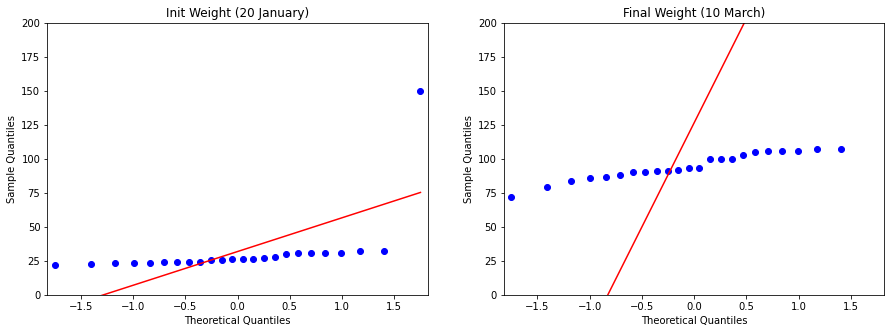

In [16]:
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15,5))
ax1.title.set_text('Init Weight (20 January)')
ax2.title.set_text('Final Weight (10 March)')
qqplot(init_weight, line='s', ax=ax1)
qqplot(final_weight, line='s', ax=ax2)
ax1.set_ylim([0, 200])
ax2.set_ylim([0, 200])
pyplot.show()

Use the __Wilcoxon signed-rank test__ when you'd like to use the __paired t–test__, but the differences are severely non-normally distributed. Use the paired t–test when you have one measurement variable and two nominal variables, one of the nominal variables has only two values, and you only have one observation for each combination of the nominal variables; in other words, you have multiple pairs of observations. It tests whether the mean difference in the pairs is different from 0. There are two nominal variables: date (20 January or 10 March) and animal subject, and one measurement variable weight (Kg).
The hypothesis being tested is:

- __Null hypothesis (H0)__: "_The difference between the pairs follows a symmetric distribution around zero._"
- __Alternative hypothesis (HA)__: "_The difference between the pairs does not follow a symmetric distribution around zero._"


In [17]:
from scipy.stats import wilcoxon

T, pval = wilcoxon(init_weight, final_weight)

In [18]:
if pval < alpha:  
    print("we are rejecting null hypothesis, result is statistically significant. Weight changed significantly.")
else:
    print("we are accepting null hypothesis, the result is NOT statistically significant. Weight DID NOT change significantly.")

we are rejecting null hypothesis, result is statistically significant. Weight changed significantly.
